In [219]:
import numpy as np
from tqdm import tqdm_notebook as tqdm


def p( x, t=1.0 ):
    return np.exp( -10*t*((x-2)**2) ) + 0.3*np.exp( -0.5*10*t*((x+1)**2) )

# Metropolis Hastings MCMC

In [256]:
accepts = 0
    
def MH_MCMC(sigma=.1):
    global accepts
    T = 10000
    x_next = np.random.random()

    ts = []
    ts.append(x_next)
    
    for t in xrange(T-1):
        x = x_next

        #sample from proposal distribution
        x_candidate = np.random.normal(x, sigma)

        #compute acceptance probability
        alpha = p(x_candidate) / p(x) 
        r = min([1.,alpha])
        u = uniform(0,1)

        #set new sample to...
        x_next = x
        if u < r:
            accepts += 1
            x_next = x_candidate
        ts.append(x_next) 
    return ts
            

Populating the interactive namespace from numpy and matplotlib


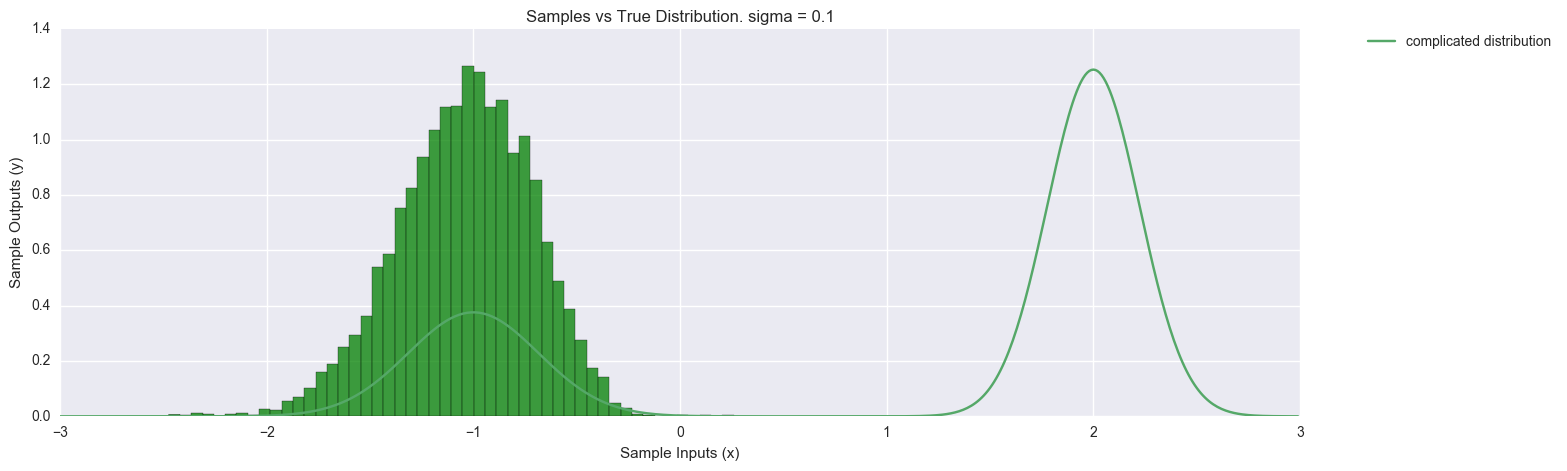

Acceptance Rate - sigma .1 : 0.8982


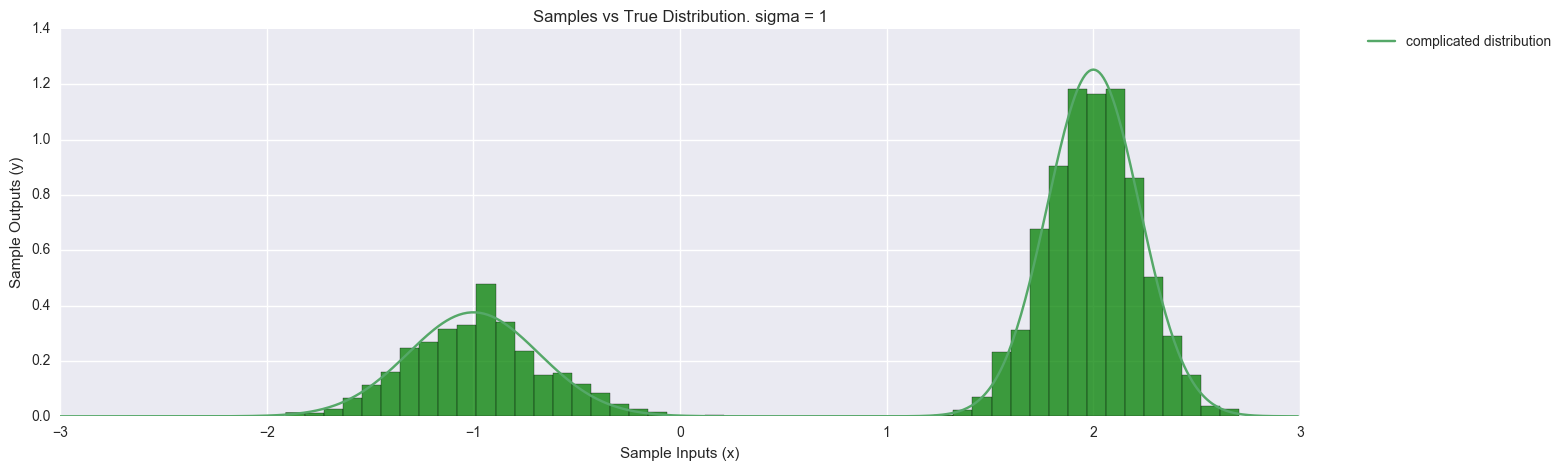

Acceptance Rate - sigma 1 : 0.2937


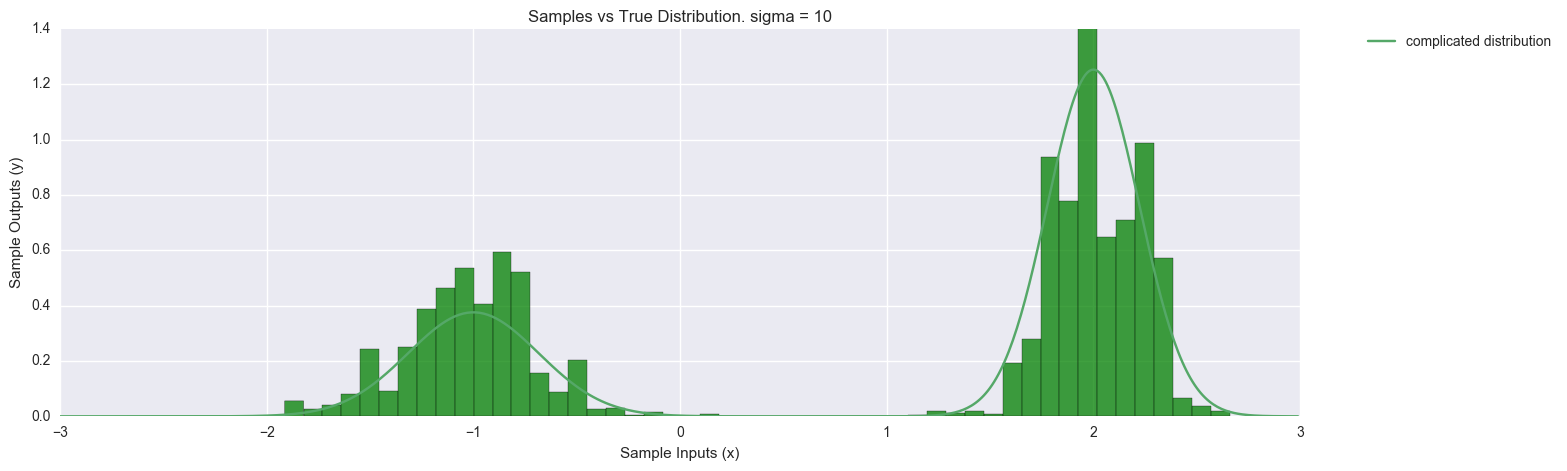

Acceptance Rate - sigma 10 : 0.0561


In [258]:
import matplotlib.pyplot as plt
import seaborn
# these two lines allow you to control the figure size
%matplotlib inline 
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

def Plot_Histogram(sigma=.1):   
    #Run MH MCMC
    global accepts
    accepts = 0
    ts = MH_MCMC(sigma)

    #Plot Histogram
    plt.hist(ts, 50, normed=1, facecolor='green', alpha=0.75)

    #Plot Real Distribtion
    h = .01
    xs = np.arange(-3,3,h)
    ys = []
    for x in xs:
        ys.append(p(x))

    ys = np.asarray(ys)
    ys = ys/ np.sum(ys * h)
    plt.plot(list(xs), list(ys), label='complicated distribution')
    
    #Beautify Plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pylab.ylim([0,1.4])
    plt.ylabel('Sample Outputs (y)')
    plt.xlabel('Sample Inputs (x)')
    plt.title('Samples vs True Distribution. sigma = ' + str(sigma))
    plt.show()

Plot_Histogram(sigma=.1)
print "Acceptance Rate - sigma .1 :", accepts/10000.0
Plot_Histogram(sigma=1)
print "Acceptance Rate - sigma 1 :", accepts/10000.0
Plot_Histogram(sigma=10)
print "Acceptance Rate - sigma 10 :", accepts/10000.0

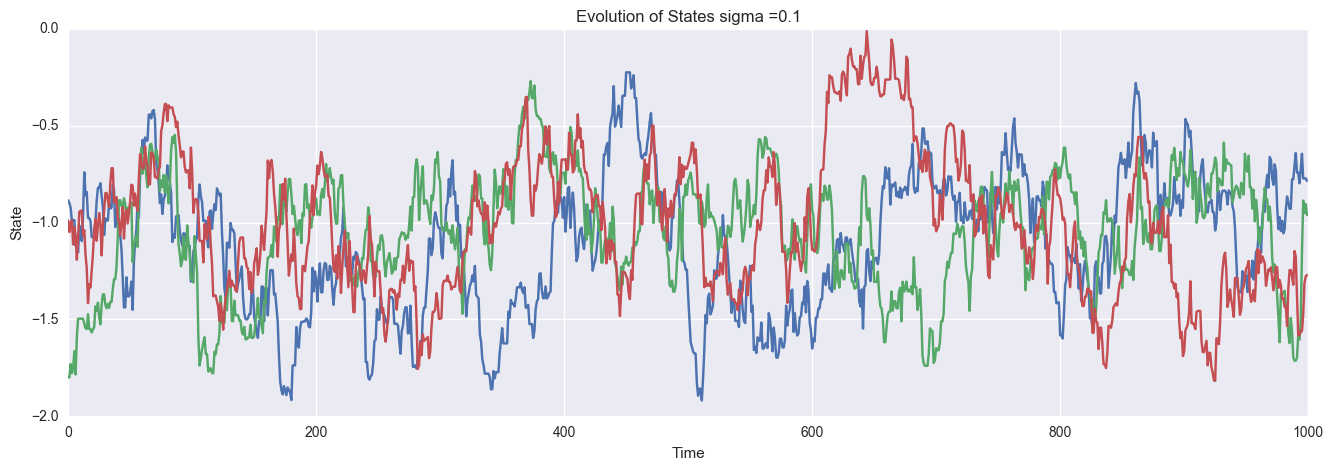

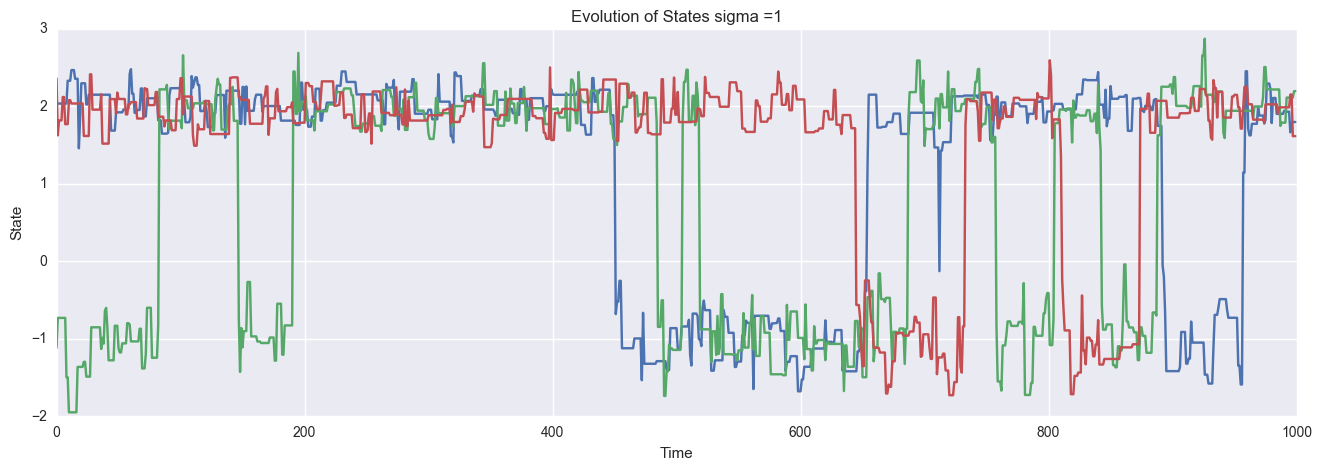

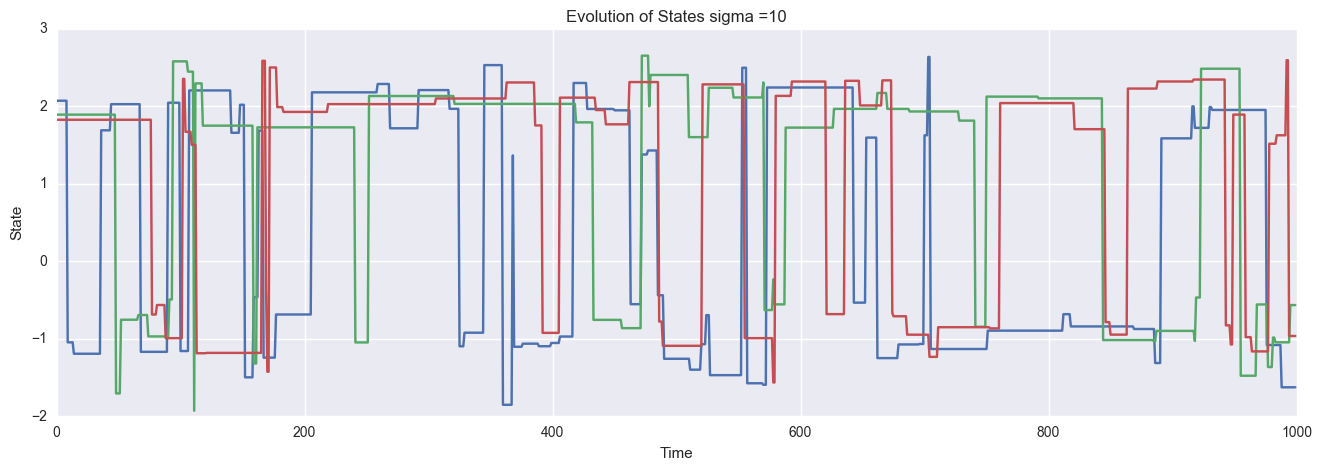

In [249]:
def Plot_Evolution_of_States(sigma=.1):
    ts = MH_MCMC(sigma)
    plt.plot(np.arange(1000), ts[9000:], label='time')

def BeautifyPlot(sigma = .1):
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.title('Evolution of States sigma =' + str(sigma))
    plt.show()
    
for i in xrange(3):
    Plot_Evolution_of_States(sigma=.1) 
BeautifyPlot(sigma = .1)

for i in xrange(3):
    Plot_Evolution_of_States(sigma=1) 
BeautifyPlot(sigma = 1)

for i in xrange(3):
    Plot_Evolution_of_States(sigma=10) 
BeautifyPlot(sigma = 10)

# Hamiltonian MCMC


Acceptance rate:  0.655

Acceptance rate:  0.6417

Acceptance rate:  0.6474


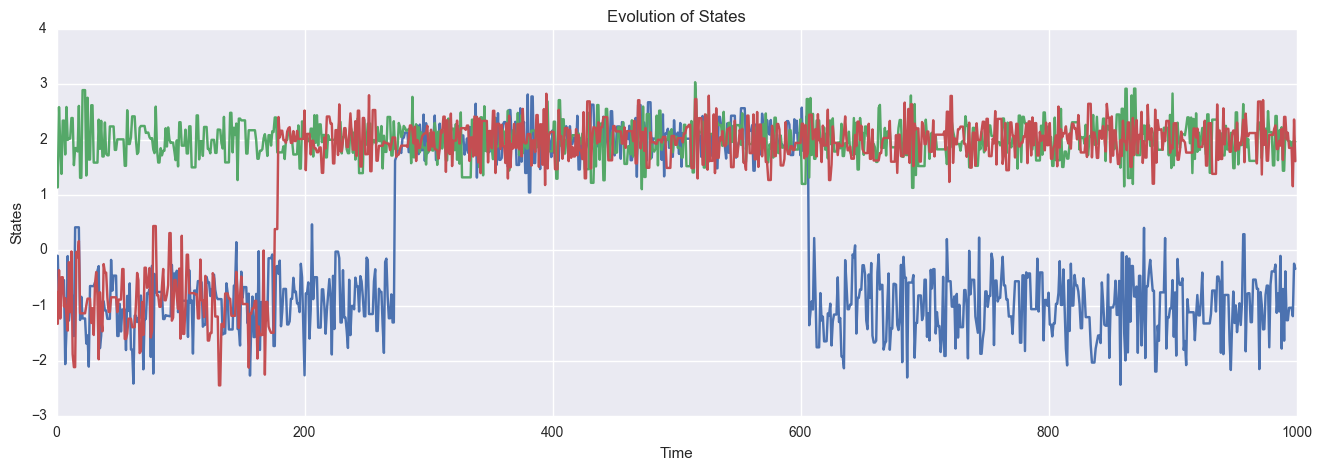

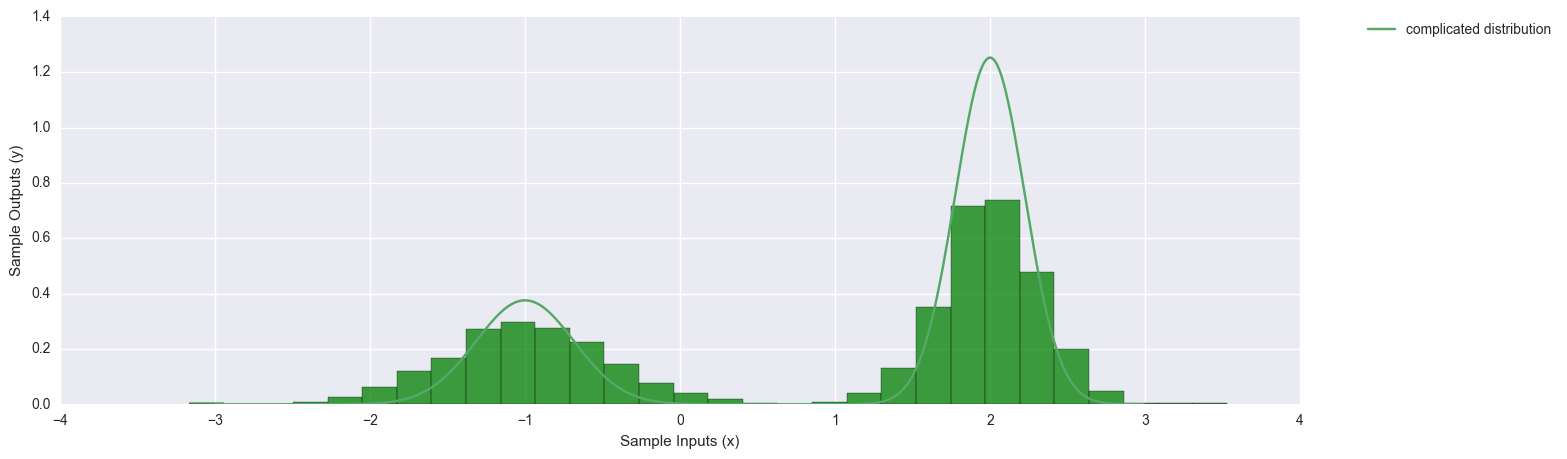

In [253]:
from tqdm import tqdm_notebook as tqdm
from autograd import grad
import autograd.numpy as np

accepts = 0

def U(q):
    return -1 * np.log(p(q))

def HMC(U, grad_U, epsilon, L, current_q, accepts):
    q = current_q
    m = 1
    p = np.random.normal(0, 2.5)
    current_p = p
    
    # Make a half step for momentum at the beginning
    p = p - epsilon * grad_U(q) / 2
    
    # Alternate full steps for position and momentum
    for i in xrange(1, L+1):
        # Make a full step for the position
        q = (q + epsilon * p) * (1.0/ m)
        # Make a full step for the momentum, except at end of trajectory
        if not (i == L):
            p = p - epsilon * grad_U(q)
            
    
    # Make a half step for momentum at the end.
    p = p - epsilon * grad_U(q) / 2
    # Negate momentum at end of trajectory to make the proposal symmetric
    p = -p
    
    # Evaluate potential and kinetic energies at start and end of trajectory
    current_U = U(current_q)
    current_K = (sum(current_p**2) / 2) * (1.0 / m)
    proposed_U = U(q)
    proposed_K = (sum(p**2) / 2) * (1.0 / m)
    
    u = uniform(0,1)
    
    if u < exp(current_U-proposed_U+current_K-proposed_K):
        accepts +=1
        return q, accepts
    else:
        return current_q, accepts
    
grad_U = grad(U)
epsilon = .3
T = 10000

def RUN_HMC():
    current_q = np.random.random()

    ts = []
    ts.append(current_q)
    accepts = 0
    for t in tqdm(xrange(T-1)):
        current_q, accepts = HMC(U, grad_U, epsilon, 100, current_q, accepts)
        ts.append(current_q)
    print "Acceptance rate: ", accepts/float(T)
    return ts

def BeautifyPlot():
    plt.ylabel('States')
    plt.xlabel('Time')
    plt.title('Evolution of States')
    plt.show()
    
def Plot_Evolution_of_States(function):
    ts_1 = function()
    ts_2 = function()
    ts_3 = function()
    plt.plot(np.arange(1000), ts_1[9000:])
    plt.plot(np.arange(1000), ts_2[9000:])
    plt.plot(np.arange(1000), ts_3[9000:])
    BeautifyPlot()
    return ts_1

def Plot_Histogram(ts): 
    #Plot Histogram
    plt.hist(ts, 30, normed=1, facecolor='green', alpha=0.75)

    #Plot Real Distribtion
    h = .01
    xs = np.arange(-3,3,h)
    ys = []
    for x in xs:
        ys.append(p(x))

    ys = np.asarray(ys)
    ys = ys / np.sum(ys * h)
    plt.plot(list(xs), list(ys), label='complicated distribution')
    
    #Beautify Plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pylab.ylim([0,1.4])
    plt.ylabel('Sample Outputs (y)')
    plt.xlabel('Sample Inputs (x)')
    plt.show()
    
    
_ts = Plot_Evolution_of_States(RUN_HMC)

Plot_Histogram(_ts)

   

# Write Up

### 1) What was the acceptance rate of each algorithm? (ie, what percentage of proposals were accepted)

#### MH MCMC Acceptance Rates

Acceptance Rate - sigma .1 : 0.8982

Acceptance Rate - sigma 1 : 0.2937

Acceptance Rate - sigma 10 : 0.0561

#### 3 Hamiltonian MCMC Acceptance Rates On Sigma = 2.5

Acceptance rate:  0.655

Acceptance rate:  0.6417

Acceptance rate:  0.6474

### 2) Why don't some inference algorithms explore both modes of the density?

Sometimes our inference algorithms wouldn't do a thorough job of sampling from the whole distribution. This was due to the constraint on the variance of the proposals for the MCMC algorithms. Once the variance was increased, the proposals were allowed to "explore" within the data more fully, and recommend a more varied sample of the data. 


### 3) Why do some algorithms stay in the same state repeatedly? Is this good or bad?

Some algorithms may stay in the same state repeatedly for several reasons. As mentioned before, the variance on the proposal may be too small. However, as seen in the Hamiltonian MCMC inference algorithm, the cause of repeated states also depended on the step size of the algorithm. Naturally, there is a balance between exploiting and exploring the data. When we explore the data in just the right manner, we are able to gain samples that give a nice description of the distribution. However, when we explore too much, (have step sizes or variances too large) our method becomes unstable and we are unable to sample from the distribution in an informative manner. 

### 4) What were the best values for the variance of the momentum variables and the timestep you found? How did you know that they were good? 

The best value I found for the variance of the momentum was 2.5. When it was too small, the state change as time went on would remain one modal too long, and hardly bounce to the other model. When it was too large, the states would quickly bounce from state to state without sampling from each model well enough. 

The best value for the time step was about 0.3. The same problems arose as the variance change of the momentum when testing the time step. 

### Testing notes

One of the biggest problems I had was trying to figure out if the variance of the momentum was the same as M in the paper. According to one of the slides in lecture, it pointed out that it was M, however, testing the parameters for the Hamiltonian MCMC algorithm was impossible to find a solution that sampled well from the distribution if M did equal to the variance of the momentum. Therefore, I chose to make them different. I'm not entirely sure if that's correct, but I was able to get better samples when they were different values.
